# Capstone Analytic Report

Thinkful Prep Course

Author: Bryan Corder

Mentor: Hoa Chan

Submission Date: 2017/07/08

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math
from scipy.stats import ttest_ind
import pylab
import scipy.stats as stats
from sklearn import datasets, linear_model
%matplotlib inline

# California's Next Napa?

When people talk about American wine, there is no getting around California's importance with nearly 90% of American wine being produced there. The rennaissance of American wine started after World War 2 when heros of American wine such as Robert Mondavi experimented with the production of "fine wine" again. Others copied, and soon, Napa Valley wines were winning in international competitions including the Paris Wine Tasting of 1976, also referred to as the Judgment of Paris. Since then, the name Napa has become synonymous with quality wines, especially for their unrivaled Cabernet Sauvignon.

However, situated just three hours south of San Francisco, Paso Robles in San Luis Obispo County has started to make a name for itself. According to the Paso Wine Alliance (www.Pasowine.com), the number of vineyards has exploded in the past couple decades to over 200 wineries today. Traditionally known for their Zinfandel and Rhone varieties (e.g. Syrah), Cabernet Sauvignon is starting to make a name for itself making some claim that Paso Robles is the next Napa. 

This report attempts to dig into the claims by answering the following analytic questions using data from the Department of Agriculture and the  California Chapter of the American Society of Farm Managers and Rural Appraisers (ASFMRA).

## 1. Analytic Questions

a) Does Paso Robles have the same focus on Cabernet Sauvignon as Napa does?

b) Does the market value land in Paso Robles the same as it prices land in Napa Valley?

c) Does the market value Cabernet Sauvignon grapes grown in the region of Paso Robles?

## Data Description

Since 1976, The National Agricultural Statistics Service of the Department of Agriculture has published the annual "Grape Crush Reports" on the types of grapes California farmers are growing (both for food and for wine), but for the purposes of this report, I chose to use price data from the year 2000 and the acreage reports from 2008 since that report only goes back that far. (https://www.nass.usda.gov/Statistics_by_State/California/Publications/Grape_Crush/Reports/) (https://www.nass.usda.gov/Statistics_by_State/California/Publications/Grape_Acreage/)

This report calls the area referenced in the data sets as San Luis Obispo County, Paso Robles, to distinguish the warmer area east of the Santa Lucia Coastal Range where the weather is better suited to Cabernet Sauvignon than the coast, which varieties like Chardonnay and Pinot Noir reign. As you can see from the below bar graph, Paso Robles ("San Luis Obispo") is the second largest acreage dedicated to Cabernet Sauvignon in the entire state with 13,772 acres planted, second only to Napa Valley with 20,759 acres planted.

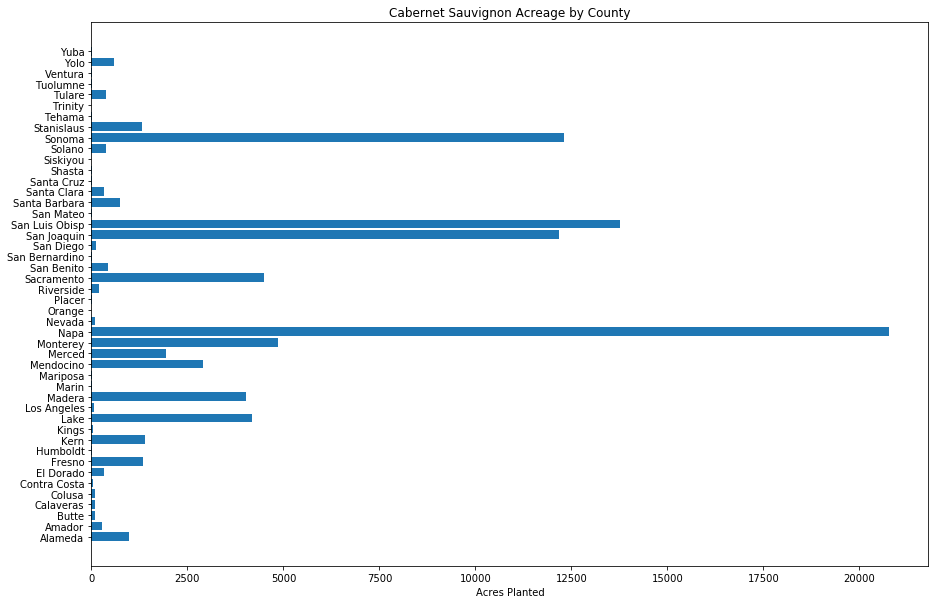

In [34]:
ca_cab_df = pd.read_csv('CA Cabernet.csv')
acres = ca_cab_df['Total']
plt.figure(figsize=(15, 10))
county = ca_cab_df['CABERNET SAUVIGNON']
xs = [i + 0.5 for i, _ in enumerate(county)]
plt.barh(xs, acres)
plt.xlabel('Acres Planted')
plt.title('Cabernet Sauvignon Acreage by County')
plt.yticks([i + 0.5 for i, _ in enumerate(county)], county)
plt.show()

Question 1: Does Paso Robles have the focus on Cabernet Sauvignon as Napa does?

In [35]:
napa_acre_df = pd.read_csv('Napa Acres.csv')
slo_acre_df = pd.read_csv('SLO Acres.csv')
napa_acre_df.shape
slo_acre_df.shape
print(napa_acre_df, slo_acre_df)

               Variety  2008 and Earlier  2009  2010  2011  2012  2013  2014  \
0            AGLIANICO                 1     0     0     0     0     0     0   
1    ALICANTE BOUSCHET                 1     0     0     0     1     0     0   
2              BARBERA                10     0     0     0     0     0     0   
3       CABERNET FRANC              1032    25    36     6     2    13     8   
4   CABERNET SAUVIGNON             17834   503   209   312   429   270   363   
5            CARIGNANE                 4     0     0     0     0     0     0   
6            CARMENERE                 5     0     0     0     0     2     0   
7             CHARBONO                46     2     0     0     0     0     0   
8              CINSAUT                 1     0     0     0     0     0     0   
9             COUNOISE                 0     0     0     0     0     0     0   
10            DOLCETTO                 7     0     0     0     0     0     0   
11       GAMAY  (NAPA)                21

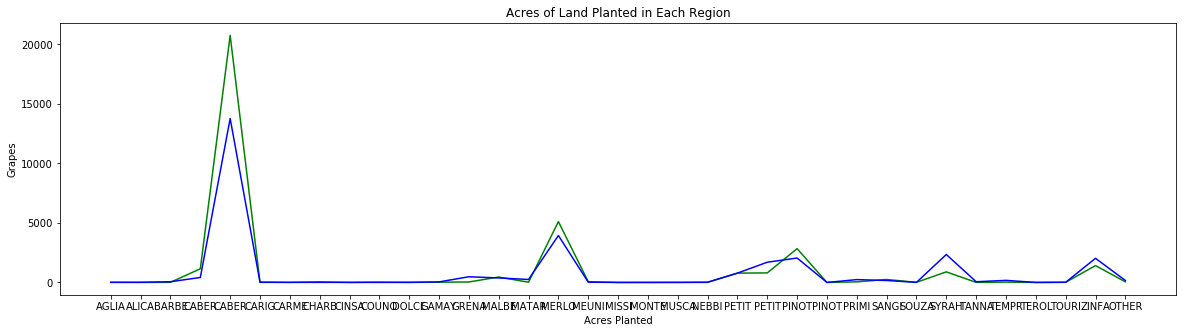

In [36]:
plt.figure(figsize=(20, 5))
plt.plot(napa_acre_df['Total'], color = 'green')
plt.plot(slo_acre_df['Total'], color = 'blue')
keys = [x[0:5] for x in napa_acre_df['Variety']]
x_pos = np.arange(len(keys))
plt.xticks(x_pos, keys)
plt.ylabel('Grapes')
plt.xlabel('Acres Planted')
plt.title('Acres of Land Planted in Each Region')

plt.show()

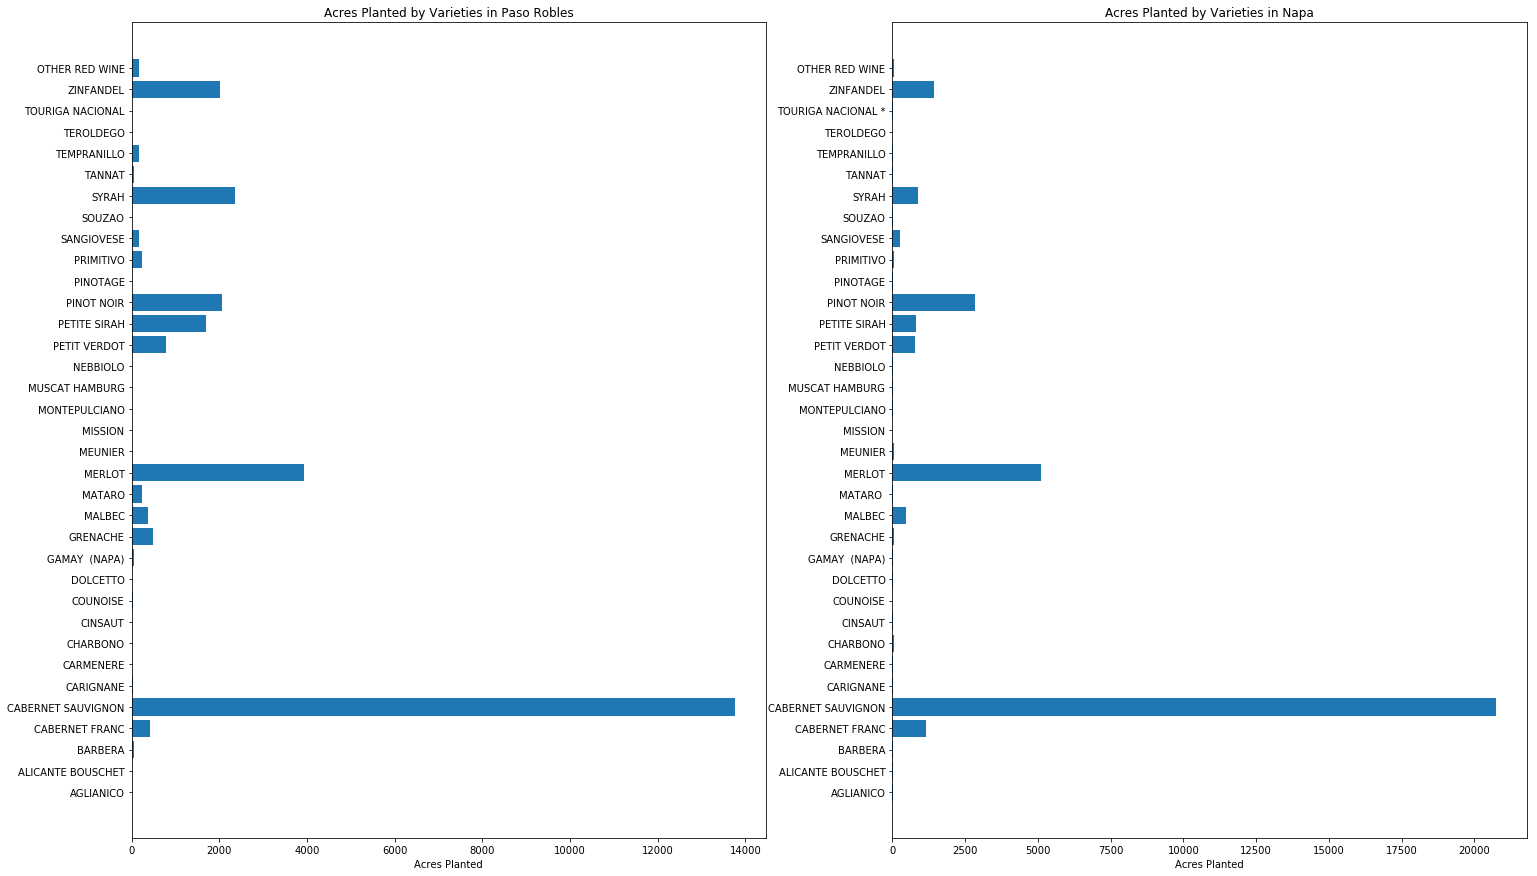

In [37]:
plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
grapes = slo_acre_df['Variety']
acres = slo_acre_df['Total']
acres2 = napa_acre_df['Total']
xs = [i + 0.5 for i, _ in enumerate(grapes)]
plt.barh(xs, acres)
plt.xlabel('Acres Planted')
plt.title('Acres Planted by Varieties in Paso Robles')
plt.yticks([i + 0.5 for i, _ in enumerate(grapes)], grapes)

plt.subplot(1, 2, 2)
grapes = napa_acre_df['Variety']
acres2 = napa_acre_df['Total']
xs = [i + 0.5 for i, _ in enumerate(grapes)]
plt.barh(xs, acres2)
plt.xlabel('Acres Planted')
plt.title('Acres Planted by Varieties in Napa')
plt.yticks([i + 0.5 for i, _ in enumerate(grapes)], grapes)
plt.show()

The bar graph above lists all of the varieties grown in Napa and Paso Robles, and it is clear from the size of the Cabernet Sauvignon bar that it is the dominant variety in both regions. Let's look at the evolution of both regions in the past decade in numbers.

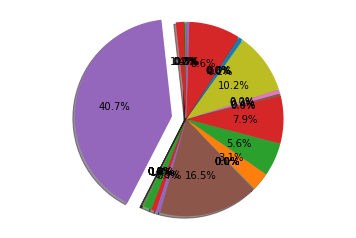

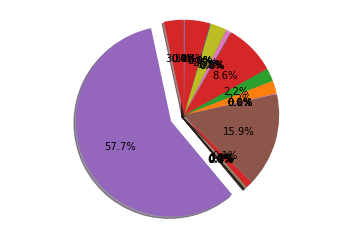

In [38]:
plt.figure(0)
labels = slo_acre_df['Variety']
sizes = slo_acre_df['2008 and Earlier']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0, 0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.figure(1)
labels = napa_acre_df['Variety']
sizes = napa_acre_df['2008 and Earlier']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0, 0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

The above pie graphs show that in 2008, Cabernet Sauvignon took just 40.7% (8,908 acres of 21,554 acres of red grapes) of the total acreage of wine grapes in Paso Robles while it took on 57.7% (17,834 acres of 30,923 of red grapes) in Napa Valley making it clearly the dominant grape in the region.

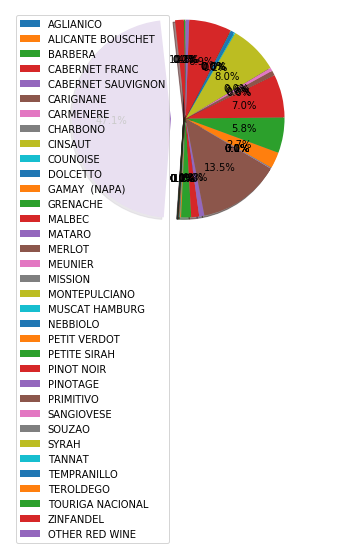

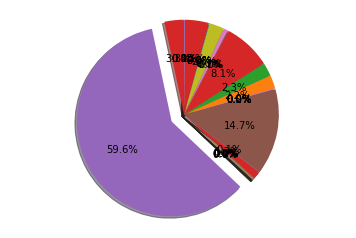

In [39]:
plt.figure(0)
labels = slo_acre_df['Variety']
sizes = slo_acre_df['Total']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0, 0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.figure(1)
labels = napa_acre_df['Variety']
sizes = napa_acre_df['Total']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0, 0, 0, 0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

However, by 2016, Cabernet Sauvignon now occupies 47.1% (13,772 acres of 28,967 acres of red grapes) of the total acres while it has taken on slightly more growth in Napa Valley at 59.6% (20,759 acres of 34,838 acres of red grapes).  Of the 7,413 acres planted in Paso Robles, 4,864 of them were dedicated to Cabernet Sauvignon or nearly two out of three acres of vines planted were dedicated to Cabernet Sauvignon.

Ttest_indResult(statistic=-0.21949722999080618, pvalue=0.82701182704319987)


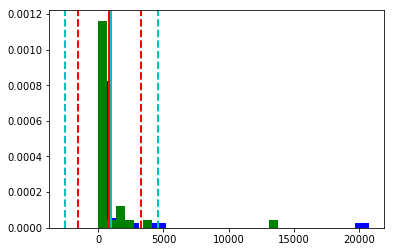

In [40]:
napa = napa_acre_df['Total']
paso = slo_acre_df['Total']
plt.hist(napa, normed=True, bins=20, color='b', label='Napa')
plt.hist(paso, normed=True, bins=20, color='g', label='Paso Robles')
plt.axvline(napa.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(napa.mean() + napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(napa.mean() - napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(paso.mean() + paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean() - paso.std(), color='red', linestyle='dashed', linewidth=2)
print(ttest_ind(paso, napa, equal_var=False))
plt.show()

Plotting them in a histogram, you can see their distributions are very similar with a ttest score of less than 1 with a p value also less than 1 meaning the low variation is a reliable number.

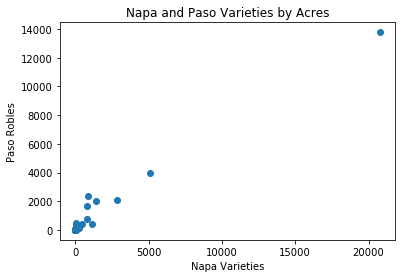

In [41]:
plt.scatter(x = napa_acre_df['Total'], y = slo_acre_df['Total'])
plt.xlabel('Napa Varieties')
plt.ylabel('Paso Robles')
plt.title('Napa and Paso Varieties by Acres')

plt.show()

When plotted against each other in a scatter plot, they again closely align to the line x = y showing that they both have an emphasis on Cabernet Sauvignon grapes. Paso Robles may not have as many acres planted as Napa Valley, but trends show that Paso Robles is adopting the grape faster than any other variety, while Napa Valley continues to expand its Cabernet production

Question 2: Does the market value land in Paso Robles the same as it prices land in Napa Valley?

In [42]:
land_df = pd.read_csv('Land Prices.csv')
land_df.shape
print(land_df)

    Unnamed: 0  Napa Prime Low  Napa Prime High  Napa Secondary Low  \
0         2003             NaN           180000                 NaN   
1         2004             NaN           180000                 NaN   
2         2005             NaN           200000                 NaN   
3         2006             NaN           275000                 NaN   
4         2007        225000.0           285000            130000.0   
5         2008        225000.0           300000            115000.0   
6         2009        225000.0           300000            115000.0   
7         2010        225000.0           300000            100000.0   
8         2011        225000.0           300000             90000.0   
9         2012        200000.0           300000            100000.0   
10        2013        200000.0           300000            100000.0   
11        2014        220000.0           320000            100000.0   
12        2015        250000.0           370000            120000.0   

    N

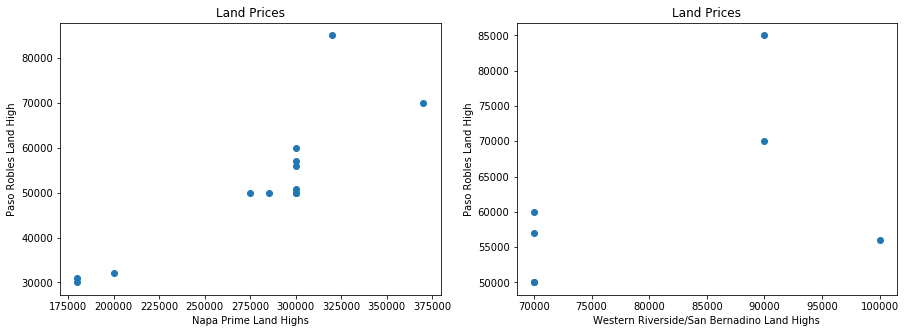

In [43]:
napa_high = land_df['Napa Prime High']
paso_high = land_df['Paso High']
wrsb_high = land_df['wrsb High']

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x = napa_high, y = paso_high)
plt.xlabel('Napa Prime Land Highs')
plt.ylabel('Paso Robles Land High')
plt.title('Land Prices')

plt.subplot(1, 2, 2)
plt.scatter(x = wrsb_high, y = paso_high)
plt.xlabel('Western Riverside/San Bernadino Land Highs')
plt.ylabel('Paso Robles Land High')
plt.title('Land Prices')

plt.show()

The scatter plots shows more of a correlation between Napa's prime land versus Paso Robles than the highly dispersed relationship between Paso Robles another wine growing region south of Los Angeles.

Ttest_indResult(statistic=-13.883594876182109, pvalue=1.7350150647847125e-09)


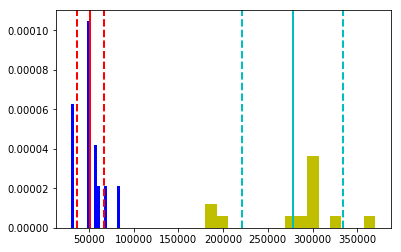

In [44]:
napa = land_df['Napa Prime High']
paso = land_df['Paso High']
plt.hist(napa, normed=True, bins=15, color='y', label='Napa')
plt.hist(paso, normed=True, bins=15, color='b', label='Paso Robles')
plt.axvline(napa.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(napa.mean() + napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(napa.mean() - napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(paso.mean() + paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(paso.mean() - paso.std(), color='red', linestyle='dashed', linewidth=2)
print(ttest_ind(paso, napa, equal_var=False))
plt.show()

However, plotting them on histograms shows that they are not similar distributions and that they vary too much signaling that observing Paso Robles' land prices in terms of Napa land prices is not a reliable number. The market doesn't look at vineyard space in both regions similarly.

Question 3: Napa Cabernet Sauvignon are some of the most expensive grapes on the market. As the base component in wine, it is important to see if the market values Cabernet Sauvignon grapes the same from both regions. How do they compare?

In [45]:
"""cost_df = pd.read_csv('Cost Per Ton.csv', index_col=0).loc[:,'2000':]"""
cost_df = pd.read_csv('Cost per Ton 2.csv')
cost_df.shape
print(cost_df)

    Year   area 1   area 2   area 3     Napa   area 5   area 6   area 7  \
0   2000  1973.71  1673.17  2417.96  3168.33  1094.04  1306.49  1307.47   
1   2001  2020.11  1722.40  2701.65  3728.56   904.58  1356.09  1252.58   
2   2002  1900.48  1802.72  2694.93  4020.64  1112.31  1361.22  1179.81   
3   2003  1764.95  1689.19  2537.94  4010.85   634.70  1007.42  1152.75   
4   2004  1393.49  1507.51  2397.71  3948.16   701.04   736.05  1083.54   
5   2005  1293.21  1528.53  2322.87  3970.07   762.70   963.01  1000.65   
6   2006  1291.28  1565.19  2265.69  4126.26   578.59   852.09  1008.76   
7   2007  1256.78  1376.33  2237.73  4302.49   703.70  1008.41   927.72   
8   2008  1399.10  1435.31  2321.51  4779.55  1182.27  1136.49   953.38   
9   2009  1340.66  1398.11  2280.67  4772.84  1164.92  1206.63   907.16   
10  2010  1144.39  1287.07  2083.96  4453.09  1178.30  1101.95   848.59   
11  2011  1315.75  1365.78  2111.24  4660.36  1168.33  1283.98   944.25   
12  2012  1589.23  1615.1

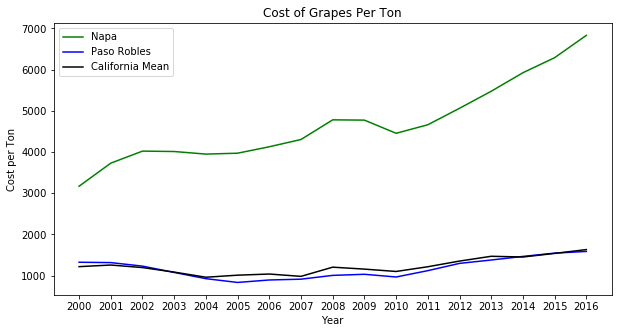

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(cost_df['Napa'], color = 'green')
plt.plot(cost_df['Paso Robles'], color = 'blue')
plt.plot(cost_df['Mean'], label='California Mean', color='black')
dates = Counter(cost_df['Year'])
years = sorted(dates.items(), key=lambda pair: pair[1])
keys = [x[0] for x in years]
x_pos = np.arange(len(keys))
plt.xticks(x_pos, keys)
plt.xlabel('Year')
plt.ylabel('Cost per Ton')
plt.title('Cost of Grapes Per Ton')
plt.legend(loc='upper left') 

plt.show()

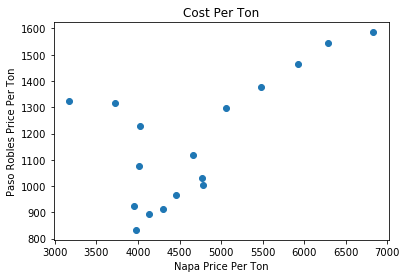

In [47]:
plt.scatter(x = cost_df['Napa'], y = cost_df['Paso Robles'])
plt.xlabel('Napa Price Per Ton')
plt.ylabel('Paso Robles Price Per Ton')
plt.title('Cost Per Ton')

plt.show()

In [51]:
plt.scatter(x = cost_df[14:17, 'Napa'], y = cost_df[14:17, 'Paso Robles'])
plt.xlabel('Napa Price Per Ton')
plt.ylabel('Paso Robles Price Per Ton')
plt.title('Cost Per Ton')

plt.show()

TypeError: unhashable type: 'slice'

Putting them on a scatter plot shows against each other shows there is no real correlation between the prices for the two regions in any given year.

In [ ]:
Napa = cost_df['Napa']
Paso = cost_df['Paso Robles']
plt.hist(Napa, normed=True, bins=15, color='c', label='Napa')
plt.hist(Paso, normed=True, bins=15, color='r', label='Paso Robles')
plt.axvline(Napa.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(Napa.mean() + Napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(Napa.mean() - Napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(Paso.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(Paso.mean() + Paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(Paso.mean() - Paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right') 
print(ttest_ind(Napa, Paso, equal_var=False))
plt.show()

While plotting their values on histograms shows that they are not similarly distributed meaning they are valued independently of each other.

In [ ]:
winemean = cost_df['Mean']
Paso = cost_df['Paso Robles']
plt.hist(winemean, normed=True, bins=15, color='c', label='Mean for California')
plt.hist(Paso, normed=True, bins=15, color='r', label='Paso Robles')
plt.axvline(winemean.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(winemean.mean() + winemean.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(winemean.mean() - winemean.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(Paso.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(Paso.mean() + Paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(Paso.mean() - Paso.std(), color='red', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right') 
print(ttest_ind(winemean, Paso, equal_var=False))
plt.show()

Again, plotting them on a histogram against the mean for the state of California (including Napa) shows that the market values grapes from Paso similar to how they price the grapes from the entire state.

## Further Research

For

## References

https://www.nass.usda.gov/Statistics_by_State/California/Publications/Grape_Crush/Reports/

https://www.nass.usda.gov/Statistics_by_State/California/Publications/Grape_Acreage/

http://www.calasfmra.com/trends.php

https://pasowine.com/faq/

Regarding the history of American Wine:
http://publishing.cdlib.org/ucpressebooks/view?docId=ft967nb63q;chunk.id=0;doc.view=print
https://www.amazon.com/American-Wine-Coming-Age-Story/dp/1569761671


In [ ]:
stats.probplot(Paso, dist="norm", plot=pylab)
pylab.show()